In [1]:
"""Explanation Video link:- https://drive.google.com/file/d/1XbveLi9dfhJZRntxXn611deVbPbCo9ju/view?usp=sharing"""

'Explanation Video link:- https://drive.google.com/file/d/1XbveLi9dfhJZRntxXn611deVbPbCo9ju/view?usp=sharing'

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data_news.csv')

In [3]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB
None
   category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                               links  \
0  https://www.huffingtonpost.com/entry/running-l...   
1  https:

1. Data Collection and Preprocessing

In [33]:
#here i will handle hmssing values by replacing unknown of empty string
data['category'] = data['category'].fillna('unknown')
data['headline'] = data['headline'].fillna('')
data['short_description'] = data['short_description'].fillna('')

In [34]:
def preprocess_text(text):
    text = text.lower()  #here i convert the text to lowercase
    text = text.replace('[^a-zA-Z]', ' ')  #here i remove non-alphabetic characters
    text = ' '.join(text.split())  #here i remove extra whitespace that text contains
    return text

#here I am going to apply the preprocessing by using preprocess_text method
data['headline'] = data['headline'].fillna('').apply(preprocess_text)
data['short_description'] = data['short_description'].fillna('').apply(preprocess_text)

In [35]:
#here i am going to combine the headline and short description to extract the feature
data['content'] = data['headline'] + ' ' + data['short_description']

In [36]:
print(data['category'].value_counts())#here i print the no. of rows that each category contains

category
WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
SPORTS            5000
Name: count, dtype: int64


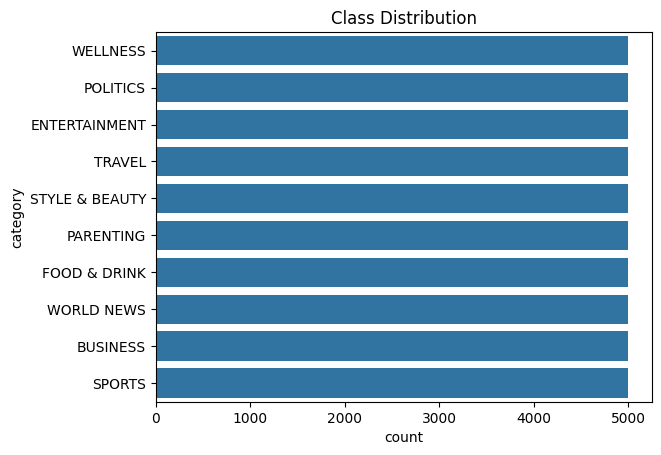

In [37]:
#here i visualize the distribution of category using countplot
sns.countplot(y=data['category'], order=data['category'].value_counts().index)
plt.title('Class Distribution')
plt.show()

In [38]:
"""From above analysis i find out that each catogery contain equal no. of rows show equal distribution"""

'From above analysis i find out that each catogery contain equal no. of rows show equal distribution'

 2. Feature Extraction

In [39]:
X = data['content']
y = data['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
#here i extract the feature by using tf-idf
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

3. Model Development and Training 

In [41]:
models = {#here i create models dictonary because i will build these 3 model as it require same function for plotting and evaluating the model
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'SVM': LinearSVC()
}

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

for model_name, model in models.items():#this for loop will build and train each model which is used in models dictonary
    print(f"{model_name} model")
    model.fit(X_train_tfidf, y_train)#here i will fit model for X_train_tfidf and y_train
    y_pred = model.predict(X_test_tfidf)#here i will make  prediction for model

    #here evaluate metrices for model like accuracy, F1socre,precision etc
    print(f"\n{model_name} metricses:")
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall :", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")


Logistic Regression model

Logistic Regression metricses:
Precision: 0.7819414503112221
Recall : 0.7806
F1 Score: 0.781042790889303
Accuracy: 0.7806

Naive Bayes model

Naive Bayes metricses:
Precision: 0.747868264236187
Recall : 0.7442
F1 Score: 0.744742342200375
Accuracy: 0.7442

SVM model

SVM metricses:
Precision: 0.78055591180747
Recall : 0.7807000000000001
F1 Score: 0.7803560432034796
Accuracy: 0.7807



In [43]:
# Insights from metrics of models:-

"""Logistic Regression has highest Precision and F1 Score and SVM has highest Recall and Accuracy so this project is for text classification so the Logistic Regression will be more suitable for this project among these models so according to me logistc will be best one for classification"""

'Logistic Regression has highest Precision and F1 Score and SVM has highest Recall and Accuracy so this project is for text classification so the Logistic Regression will be more suitable for this project among these models so according to me logistc will be best one for classification'

 4. Model Evaluation

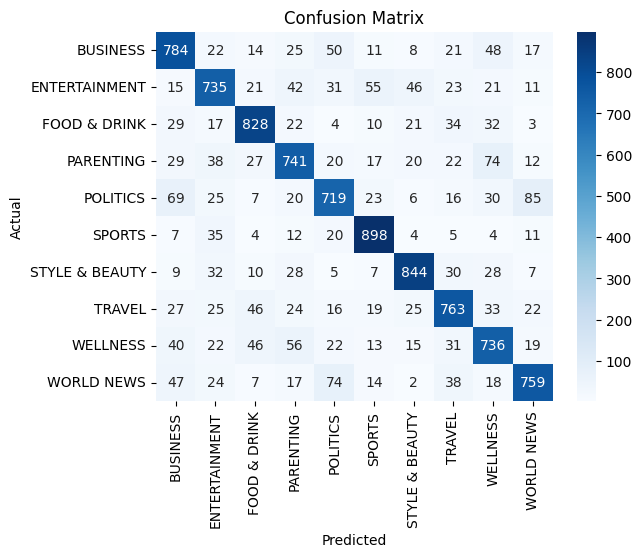

In [44]:
#here i calculate confusion matrix and display it in the form of heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [45]:
#As the logistic regression model is best so i perform further operation with regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_tfidf, y_train)
y_pred = logistic_model.predict(X_test_tfidf)

In [46]:
#here i will print feature importance for insights
feature_names = vectorizer.get_feature_names_out()
importance = logistic_model.coef_ 

for idx, category in enumerate(logistic_model.classes_):
    top_features = np.argsort(importance[idx])[-10:]  #here i will get indicex of top 10 features
    print(f"Top features for {category}: {[feature_names[i] for i in top_features]}")


Top features for BUSINESS: ['workers', 'uber', 'walmart', 'jobs', 'companies', 'financial', 'company', 'leadership', 'ceo', 'business']
Top features for ENTERTAINMENT: ['netflix', 'star', 'album', 'singer', 'jenner', 'actor', 'music', 'movie', 'trailer', 'film']
Top features for FOOD & DRINK: ['kitchen', 'chef', 'cheese', 'taste', 'cocktails', 'cooking', 'wine', 'recipe', 'food', 'recipes']
Top features for PARENTING: ['toddler', 'babies', 'parent', 'moms', 'children', 'mom', 'baby', 'parents', 'parenting', 'kids']
Top features for POLITICS: ['democratic', 'governor', 'congress', 'democrats', 'clinton', 'republican', 'obama', 'senate', 'republicans', 'gop']
Top features for SPORTS: ['coach', 'baseball', 'olympic', 'players', 'game', 'team', 'football', 'nba', 'sports', 'nfl']
Top features for STYLE & BEAUTY: ['model', 'makeup', 'designer', 'dress', 'photo', 'beauty', 'hair', 'style', 'fashion', 'photos']
Top features for TRAVEL: ['trip', 'tsa', 'hotel', 'airlines', 'vacation', 'hotels'

Now i will make prediction for unseen data using logistic regression model

In [47]:
#here is the new unseen data
new_headline = "AI technology is very advance"
new_short_description = "AI helps various workers in various industries."

#here i will  preprocess and combine the new data
new_content = preprocess_text(new_headline) + " " + preprocess_text(new_short_description)

#here i will transform into TF-IDF representation
new_content_tfidf = vectorizer.transform([new_content])

#here i will make the prediction 
predicted_category = logistic_model.predict(new_content_tfidf)[0]

#now here i will print the prediction
print(f"The predicted category is: {predicted_category}")


The predicted category is: BUSINESS


Final opinion on the analysis:-

After analyzing the metrices for all 3 models and for our classification task i conclude that logistic regression is best model among 3 and by testing with new it gives proper  prediction as AI is used in buisness and it also provide the Buisness catrgory so for this project the logistic regression will be best 

In [2]:
"""Explanation Video lonk- https://drive.google.com/file/d/1XbveLi9dfhJZRntxXn611deVbPbCo9ju/view?usp=sharing"""

'Explanation Video lonk- https://drive.google.com/file/d/1XbveLi9dfhJZRntxXn611deVbPbCo9ju/view?usp=sharing'